In [1]:
import numpy as np

In [2]:
def primesfrom2to(n):
    # https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n-in-python/3035188#3035188
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(int(n/3) + (n%6==2), dtype=np.bool)
    sieve[0] = False
    for i in xrange(int(int(n**0.5)/3)+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[      (int((k*k)/3))      ::2*k] = False
            sieve[int((k*k+4*k-2*k*(i&1))/3)::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0]+1)|1)]

In [3]:
ps = primesfrom2to(10**7)

In [4]:
def estimate_a_val(a):
    a_max = 0
    prev = ps[0] ** a
    for nxt in ps[1:]:#
        nxt = nxt**a
        comp = nxt - prev
        if comp > a_max:
            a_max = comp
            # A, B = prev, nxt
        prev = nxt
    return a_max

In [5]:
vals = dict()

for a in range(50):
    a = 0.5 + a * 1.0 / 100 # calus b/w 0.5 and 0.99
    vals[a] = estimate_a_val(a)


In [6]:
vals

{0.5: 0.67087347929080909,
 0.51: 0.69937572510296242,
 0.52: 0.73164359618602326,
 0.53: 0.78227437522257048,
 0.54: 0.83611121095407803,
 0.55: 0.89334678293076664,
 0.56: 0.95418495830490535,
 0.5700000000000001: 1.0188414257403142,
 0.58: 1.087544364591519,
 0.59: 1.1605351512873341,
 0.6: 1.2380691049586545,
 0.61: 1.3204162744609107,
 0.62: 1.4078622690579365,
 0.63: 1.5007091351571233,
 0.64: 1.6271995837737876,
 0.65: 1.7760615069445578,
 0.66: 1.9380830246487193,
 0.67: 2.1143994837786693,
 0.6799999999999999: 2.3062424178586696,
 0.69: 2.5149475818081157,
 0.7: 2.741963650354819,
 0.71: 2.9888616344121886,
 0.72: 3.2573450741450358,
 0.73: 3.5492610722160975,
 0.74: 3.8666122358564508,
 0.75: 4.2115696019706661,
 0.76: 4.58648662550263,
 0.77: 5.1218223034816219,
 0.78: 5.7544290726004874,
 0.79: 6.4641077492074146,
 0.8: 7.2601457549967563,
 0.81: 8.1529396689566056,
 0.8200000000000001: 9.154126700613233,
 0.8300000000000001: 10.510868312114326,
 0.8400000000000001: 12.1899

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [8]:
plt.plot?

In [9]:
plotvals = [[a, vals[a]] for a in vals]
xs, ys = zip(*plotvals)

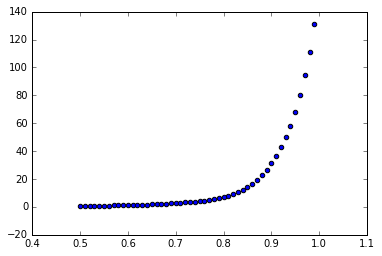

In [10]:
plt.scatter(xs, ys)

NameError: name 'yd' is not defined

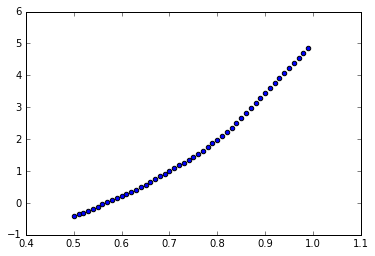

In [12]:
logys = map(np.log, ys)
plt.scatter(xs, logys)
plt.plot(xd, yd, color='r')

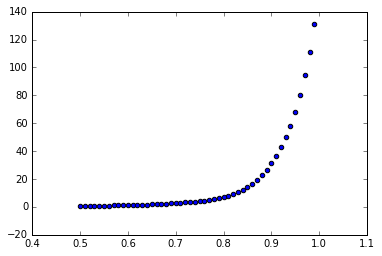

In [13]:
plt.scatter(xs, ys)

In [14]:
logys = map(np.log, ys)

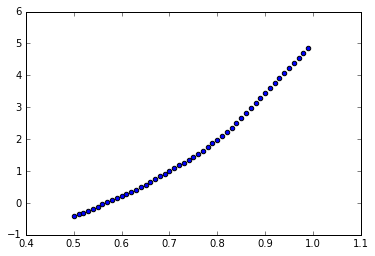

In [15]:
plt.scatter(xs, logys)

In [16]:
logxs = map(np.log, xs)

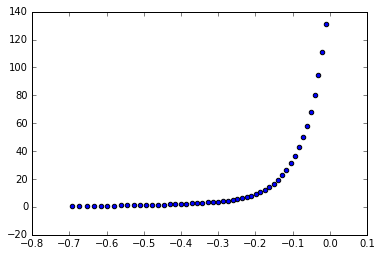

In [17]:
plt.scatter(logxs, ys)

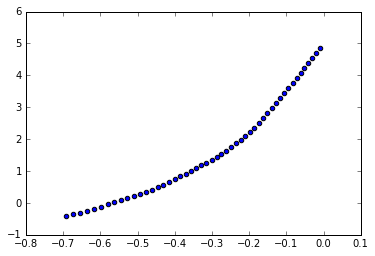

In [18]:
plt.scatter(logxs, logys)

In [19]:
z = np.polyfit(xs, logys, 2)
f = np.poly1d(z)
xd = np.linspace(0.5, 1.0, 50)
yd = f(xd)

In [ ]:
f

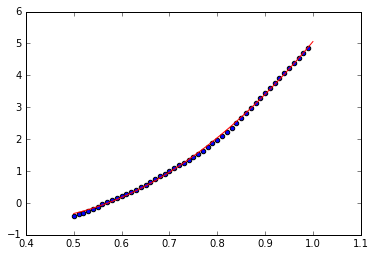

In [20]:
plt.scatter(xs, logys)
plt.plot(xd, yd, color='r')

In [21]:
supervals = dict()

for a in range(500):
    a = 0.5 + a * 1.0 / 1000 # calus b/w 0.5 and 0.99
    supervals[a] = estimate_a_val(a)

KeyboardInterrupt: 

In [ ]:
plotvals2 = [[a, supervals[a]] for a in supervals]
xs2, ys2 = zip(*plotvals2)

In [ ]:
plt.scatter(xs2, ys2)

In [ ]:
logys2 = map(np.log, ys2)

In [ ]:
plt.scatter(xs2, logys2)

In [ ]:
import sage.all as sg

In [22]:
with open("prime_gaps.txt", "r") as f:
    lines = f.readlines()

In [23]:
lines[2] # first non-header line

'     1* CFC Euclid   -300   1.44     1  2\n'

In [24]:
lines[404].split()
# gap classification discoverer year merit num_digits lower_prime

['804*', 'CFC', 'YPPauloR', '1991', '25.02', '14', '90874329411493']

Here `classification` is a three-letter string. The first and last letters indicate whether the initial (and intermediate) primes are certified primes (C), probabilistic primes (P), or otherwise. The second letter indicates whether the indicated primes are guaranteed to be the first primes of that gap.

In [25]:
first_prime_gap_pairs  = []
for line in lines[2:]:
    s = line.split()
    gap = int(s[0].rstrip('*'))
    lower = int(s[-1])
    upper = lower + gap
    first_prime_gap_pairs.append([lower, upper])

In [26]:
first_prime_gap_pairs[-10:]

[[3937457950646269397, 3937457950646270759],
 [1051140888051230423, 1051140888051231787],
 [5662268059649697577, 5662268059649698943],
 [4105079953458040849, 4105079953458042217],
 [418032645936712127, 418032645936713497],
 [4219088970046367161, 4219088970046368533],
 [2812814235281609869, 2812814235281611243],
 [5468779003189090187, 5468779003189091563],
 [5412399181863804469, 5412399181863805847],
 [1031501833130243273, 1031501833130244653]]

In [27]:
def estimate_a_val_with_gaps(a):
    a_max = 0
    for prev, nxt in first_prime_gap_pairs:
        comp = nxt**a - prev**a
        if comp > a_max:
            a_max = comp
            gap = [prev, nxt]
    return a_max, gap

In [28]:
vals_gaps = dict()
gap_maximizing = dict()

for a in range(50):
    a = 0.5 + a * 1.0 / 100
    vals_gaps[a], gap_maximizing[a] = estimate_a_val_with_gaps(a)

In [29]:
vals_gaps[.5]

0.6708734792908091

In [30]:
gap_maximizing

{0.5: [7, 11],
 0.51: [7, 11],
 0.52: [113, 127],
 0.53: [113, 127],
 0.54: [113, 127],
 0.55: [113, 127],
 0.56: [113, 127],
 0.5700000000000001: [113, 127],
 0.58: [113, 127],
 0.59: [113, 127],
 0.6: [113, 127],
 0.61: [113, 127],
 0.62: [113, 127],
 0.63: [113, 127],
 0.64: [1327, 1361],
 0.65: [1327, 1361],
 0.66: [1327, 1361],
 0.67: [1327, 1361],
 0.6799999999999999: [1327, 1361],
 0.69: [1327, 1361],
 0.7: [1327, 1361],
 0.71: [1327, 1361],
 0.72: [1327, 1361],
 0.73: [1327, 1361],
 0.74: [1327, 1361],
 0.75: [1327, 1361],
 0.76: [1327, 1361],
 0.77: [31397, 31469],
 0.78: [31397, 31469],
 0.79: [31397, 31469],
 0.8: [31397, 31469],
 0.81: [31397, 31469],
 0.8200000000000001: [31397, 31469],
 0.8300000000000001: [370261, 370373],
 0.8400000000000001: [2010733, 2010881],
 0.85: [2010733, 2010881],
 0.86: [20831323, 20831533],
 0.87: [20831323, 20831533],
 0.88: [20831323, 20831533],
 0.89: [20831323, 20831533],
 0.9: [25056082087, 25056082543],
 0.9099999999999999: [25056082087,

In [31]:
for key in sorted(vals.keys()):
    diff = vals_gaps[key] - vals[key]
    print("key is " + str(key) + ". Difference is {}".format(diff))

key is 0.5. Difference is 0.0
key is 0.51. Difference is 0.0
key is 0.52. Difference is 0.0
key is 0.53. Difference is 0.0
key is 0.54. Difference is 0.0
key is 0.55. Difference is 0.0
key is 0.56. Difference is 0.0
key is 0.57. Difference is 0.0
key is 0.58. Difference is 0.0
key is 0.59. Difference is 0.0
key is 0.6. Difference is 0.0
key is 0.61. Difference is 0.0
key is 0.62. Difference is 0.0
key is 0.63. Difference is 0.0
key is 0.64. Difference is 0.0
key is 0.65. Difference is 0.0
key is 0.66. Difference is 0.0
key is 0.67. Difference is 0.0
key is 0.68. Difference is 0.0
key is 0.69. Difference is 0.0
key is 0.7. Difference is 0.0
key is 0.71. Difference is 0.0
key is 0.72. Difference is 0.0
key is 0.73. Difference is 0.0
key is 0.74. Difference is 0.0
key is 0.75. Difference is 0.0
key is 0.76. Difference is 0.0
key is 0.77. Difference is 0.0
key is 0.78. Difference is 0.0
key is 0.79. Difference is 0.0
key is 0.8. Difference is 0.0
key is 0.81. Difference is 0.0
key is 0.82.

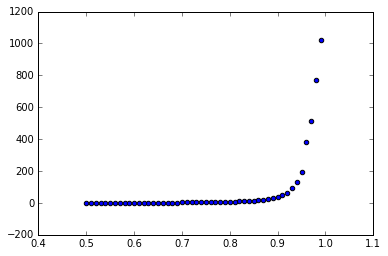

In [32]:
plotvals = [[a, vals_gaps[a]] for a in vals_gaps]
xs, ys = zip(*plotvals)
plt.scatter(xs, ys)

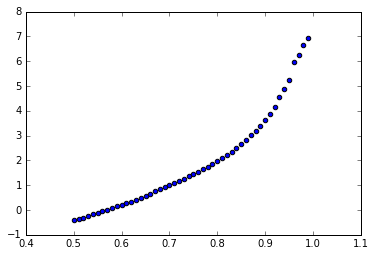

In [33]:
logys = map(np.log, ys)
plt.scatter(xs, logys)

In [57]:
z = np.polyfit(xs, logys, 4)
f = np.poly1d(z)
xd = np.linspace(0.5, 1.0, 50)
yd = f(xd)

In [58]:
f

poly1d([ 317.95162646, -841.88687997,  836.71136261, -361.84728478,
         56.74163809])

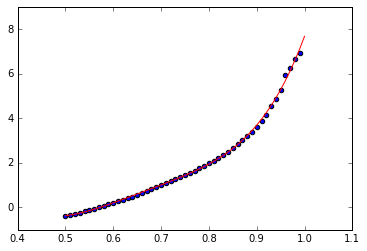

In [59]:
plt.scatter(xs, logys)
plt.plot(xd, yd, color='r')

In [64]:
shiftxs = map(lambda x: 1 - x, xs)
logxs_shift = map(np.log, shiftxs)

In [66]:
z = np.polyfit(logxs_shift, logys, 1)

In [68]:
f = np.poly1d(z)
f

poly1d([-2.20946496, -1.68371431])

In [70]:
logalpha = f[0]
minusbeta = f[1]
alpha = np.exp(logalpha)
beta = -1*minusbeta

In [71]:
def testf(x):
    return alpha * (1 - x)**(minusbeta)

(0, 1000)

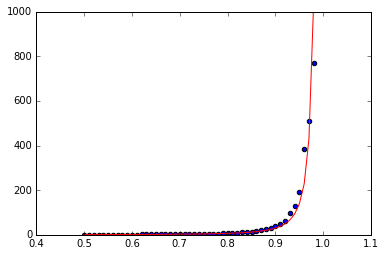

In [81]:
xd = np.linspace(0.5, 0.99, 50)
yd = testf(xd)
plt.scatter(xs, ys)
plt.plot(xd, yd, color='r')
plt.ylim((0, 1000))

In [82]:
beta

2.209464957018239

In [38]:
Xs = map(np.log, xs)

In [52]:
z = np.polyfit(Xs, logys, 4)
f = np.poly1d(z)
xd = np.linspace(-1, .1, 100)
Yd = f(xd)

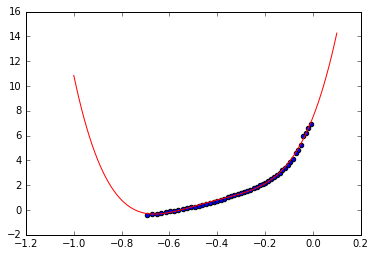

In [53]:
plt.scatter(Xs, logys)
plt.plot(xd, Yd, color='r')

In [ ]:
loglogys = map(np.log, logys)
plt.scatter(xs, loglogys)

In [ ]:
vals_gaps2 = dict()
gap_maximizing2 = dict()

for a in range(10):
    a = 0.6328380752 + a * 1.0 / 100000000000
    vals_gaps2[a], gap_maximizing2[a] = estimate_a_val_with_gaps(a)

In [ ]:
for key in sorted(gap_maximizing2):
    print("{} --- {}".format(key, gap_maximizing2[key]))

In [78]:
plt.ylim?